# Suicide rates
(data from https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

Columns: 
- country
- year (1987 - 2016, with missing years)
- sex (male, female)
- age (6 groups, (5,14), (15,24), (25,34), (35,54), (55,74), (75, ...))
- suicides_no
- population
- suicides/100k pop
- country-year
- HDI for year
- gdp_for_year (US dollars)
- gdp_per_capita (US dollars)
- generation ('Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z')

***

## Questions:
- Which country does have the biggest number of suicides?
- Which age group, sex, and generation is more likely to commit a suicide?

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
sr = pd.read_csv('master.csv', header=0)

### Exploring the data

In [3]:
sr.head(12)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
sr.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


The maximal value of 22338 in 'suicides_no' is suspiciously high in comparison to the mean.

In [6]:
sr[sr['suicides_no'] == 22338]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers


The value belongs to Russia, males between 35 and 54 year old of the Boomers generation (born between 1946-1954). After some research, such a high number could be connected to heavy consumption of alcohol (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1642767/pdf/nihms11269.pdf).

In [7]:
sr[sr['suicides/100k pop'] == 224.97]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1258,Aruba,1995,male,75+ years,2,889,224.97,Aruba1995,NaN,"1,320,670,391",17949,G.I. Generation


Another suspicious number was the maximum of number of suicides on 100k of population, however, it belonged to a small population and wasn't that significant.

In [8]:
# list of different generations
sr['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [9]:
sr.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Data cleaning

In [10]:
sr.rename(index=str, columns={'suicides/100k pop': 'suicides_100k', 'population': 'age_group_pop', 'gdp_per_capita ($)' : 'gdp_capita', ' gdp_for_year ($) ' : 'gdp_year'}, inplace=True)

In [11]:
sr.replace(',', '', regex=True, inplace=True)
sr.replace('years', '', regex=True, inplace=True)

In [12]:
sr.replace('female', 1, regex=True, inplace=True)
sr.replace('male', 0, regex=True, inplace=True)

In [41]:
total_pop = sr.loc[:,['population','country-year']].groupby('country-year').sum()

In [37]:
for i in total_pop.index.values:
    if

Albania1987
Albania1988
Albania1989
Albania1992
Albania1993
Albania1994
Albania1995
Albania1996
Albania1997
Albania1998
Albania1999
Albania2000
Albania2001
Albania2002
Albania2003
Albania2004
Albania2005
Albania2006
Albania2007
Albania2008
Albania2009
Albania2010
Antigua and Barbuda1985
Antigua and Barbuda1986
Antigua and Barbuda1987
Antigua and Barbuda1988
Antigua and Barbuda1989
Antigua and Barbuda1990
Antigua and Barbuda1991
Antigua and Barbuda1992
Antigua and Barbuda1993
Antigua and Barbuda1994
Antigua and Barbuda1995
Antigua and Barbuda1998
Antigua and Barbuda1999
Antigua and Barbuda2000
Antigua and Barbuda2001
Antigua and Barbuda2002
Antigua and Barbuda2003
Antigua and Barbuda2004
Antigua and Barbuda2005
Antigua and Barbuda2006
Antigua and Barbuda2007
Antigua and Barbuda2008
Antigua and Barbuda2009
Antigua and Barbuda2012
Antigua and Barbuda2013
Antigua and Barbuda2014
Antigua and Barbuda2015
Argentina1985
Argentina1986
Argentina1987
Argentina1988
Argentina1989
Argentina1990
Arge

United Kingdom1990
United Kingdom1991
United Kingdom1992
United Kingdom1993
United Kingdom1994
United Kingdom1995
United Kingdom1996
United Kingdom1997
United Kingdom1998
United Kingdom1999
United Kingdom2000
United Kingdom2001
United Kingdom2002
United Kingdom2003
United Kingdom2004
United Kingdom2005
United Kingdom2006
United Kingdom2007
United Kingdom2008
United Kingdom2009
United Kingdom2010
United Kingdom2011
United Kingdom2012
United Kingdom2013
United Kingdom2014
United Kingdom2015
United States1985
United States1986
United States1987
United States1988
United States1989
United States1990
United States1991
United States1992
United States1993
United States1994
United States1995
United States1996
United States1997
United States1998
United States1999
United States2000
United States2001
United States2002
United States2003
United States2004
United States2005
United States2006
United States2007
United States2008
United States2009
United States2010
United States2011
United States2012
Un

In [40]:
sr['total'] = 0

### Deleting unnecessary columns

In [13]:
sr.drop(['HDI for year','country-year'], axis=1, inplace=True)

In [14]:
sr.head()

,country,year,sex,age,suicides_no,age_group_pop,suicides_100k,gdp_year,gdp_capita,generation
0,Albania,1987,0,15-24,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,0,35-54,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,1,15-24,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,0,75+,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,0,25-34,9,274300,3.28,2156624900,796,Boomers


In [16]:
sr.corr()

,year,sex,suicides_no,age_group_pop,suicides_100k,gdp_capita
year,1.000000,0.000000e+00,-0.004546,0.008850,-0.039037,3.391343e-01
sex,0.000000,1.000000e+00,-0.144629,0.011242,-0.391496,-1.336263e-18
suicides_no,-0.004546,-1.446292e-01,1.000000,0.616162,0.306604,6.132975e-02
age_group_pop,0.008850,1.124208e-02,0.616162,1.000000,0.008285,8.150986e-02
suicides_100k,-0.039037,-3.914965e-01,0.306604,0.008285,1.000000,1.785134e-03
gdp_capita,0.339134,-1.336263e-18,0.061330,0.081510,0.001785,1.000000e+00


## Grouping the data

### Country

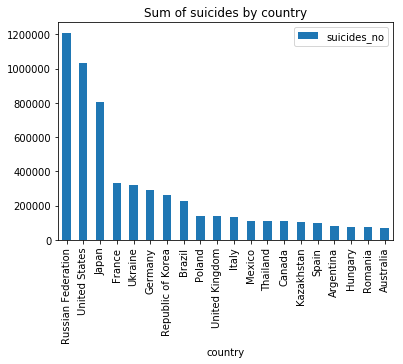

In [14]:
# by sum
sr.groupby('country').sum().sort_values(by='suicides_no', ascending=False).head(20).plot(y='suicides_no', kind='bar', title='Sum of suicides by country');

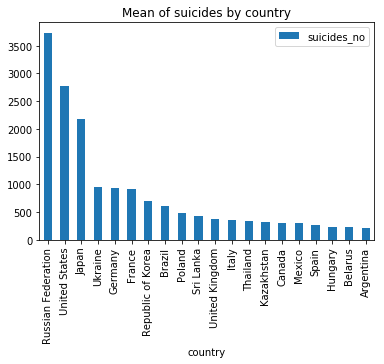

In [15]:
# by mean of each country
sr.groupby('country').mean().sort_values(by='suicides_no', ascending=False).head(20).plot(y='suicides_no', kind='bar', title='Mean of suicides by country');

### Year

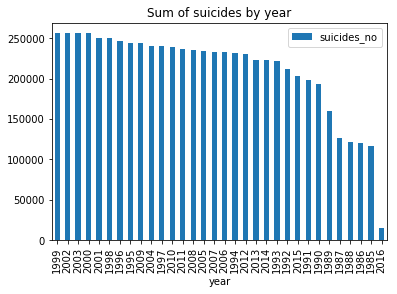

In [81]:
# by sum of each year
sr.groupby('year').sum().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Sum of suicides by year');

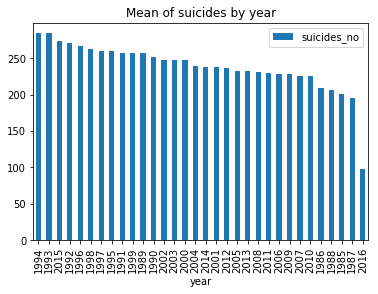

In [16]:
# by mean of each year
sr.groupby('year').mean().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Mean of suicides by year');

Grouping by year

### Country and year

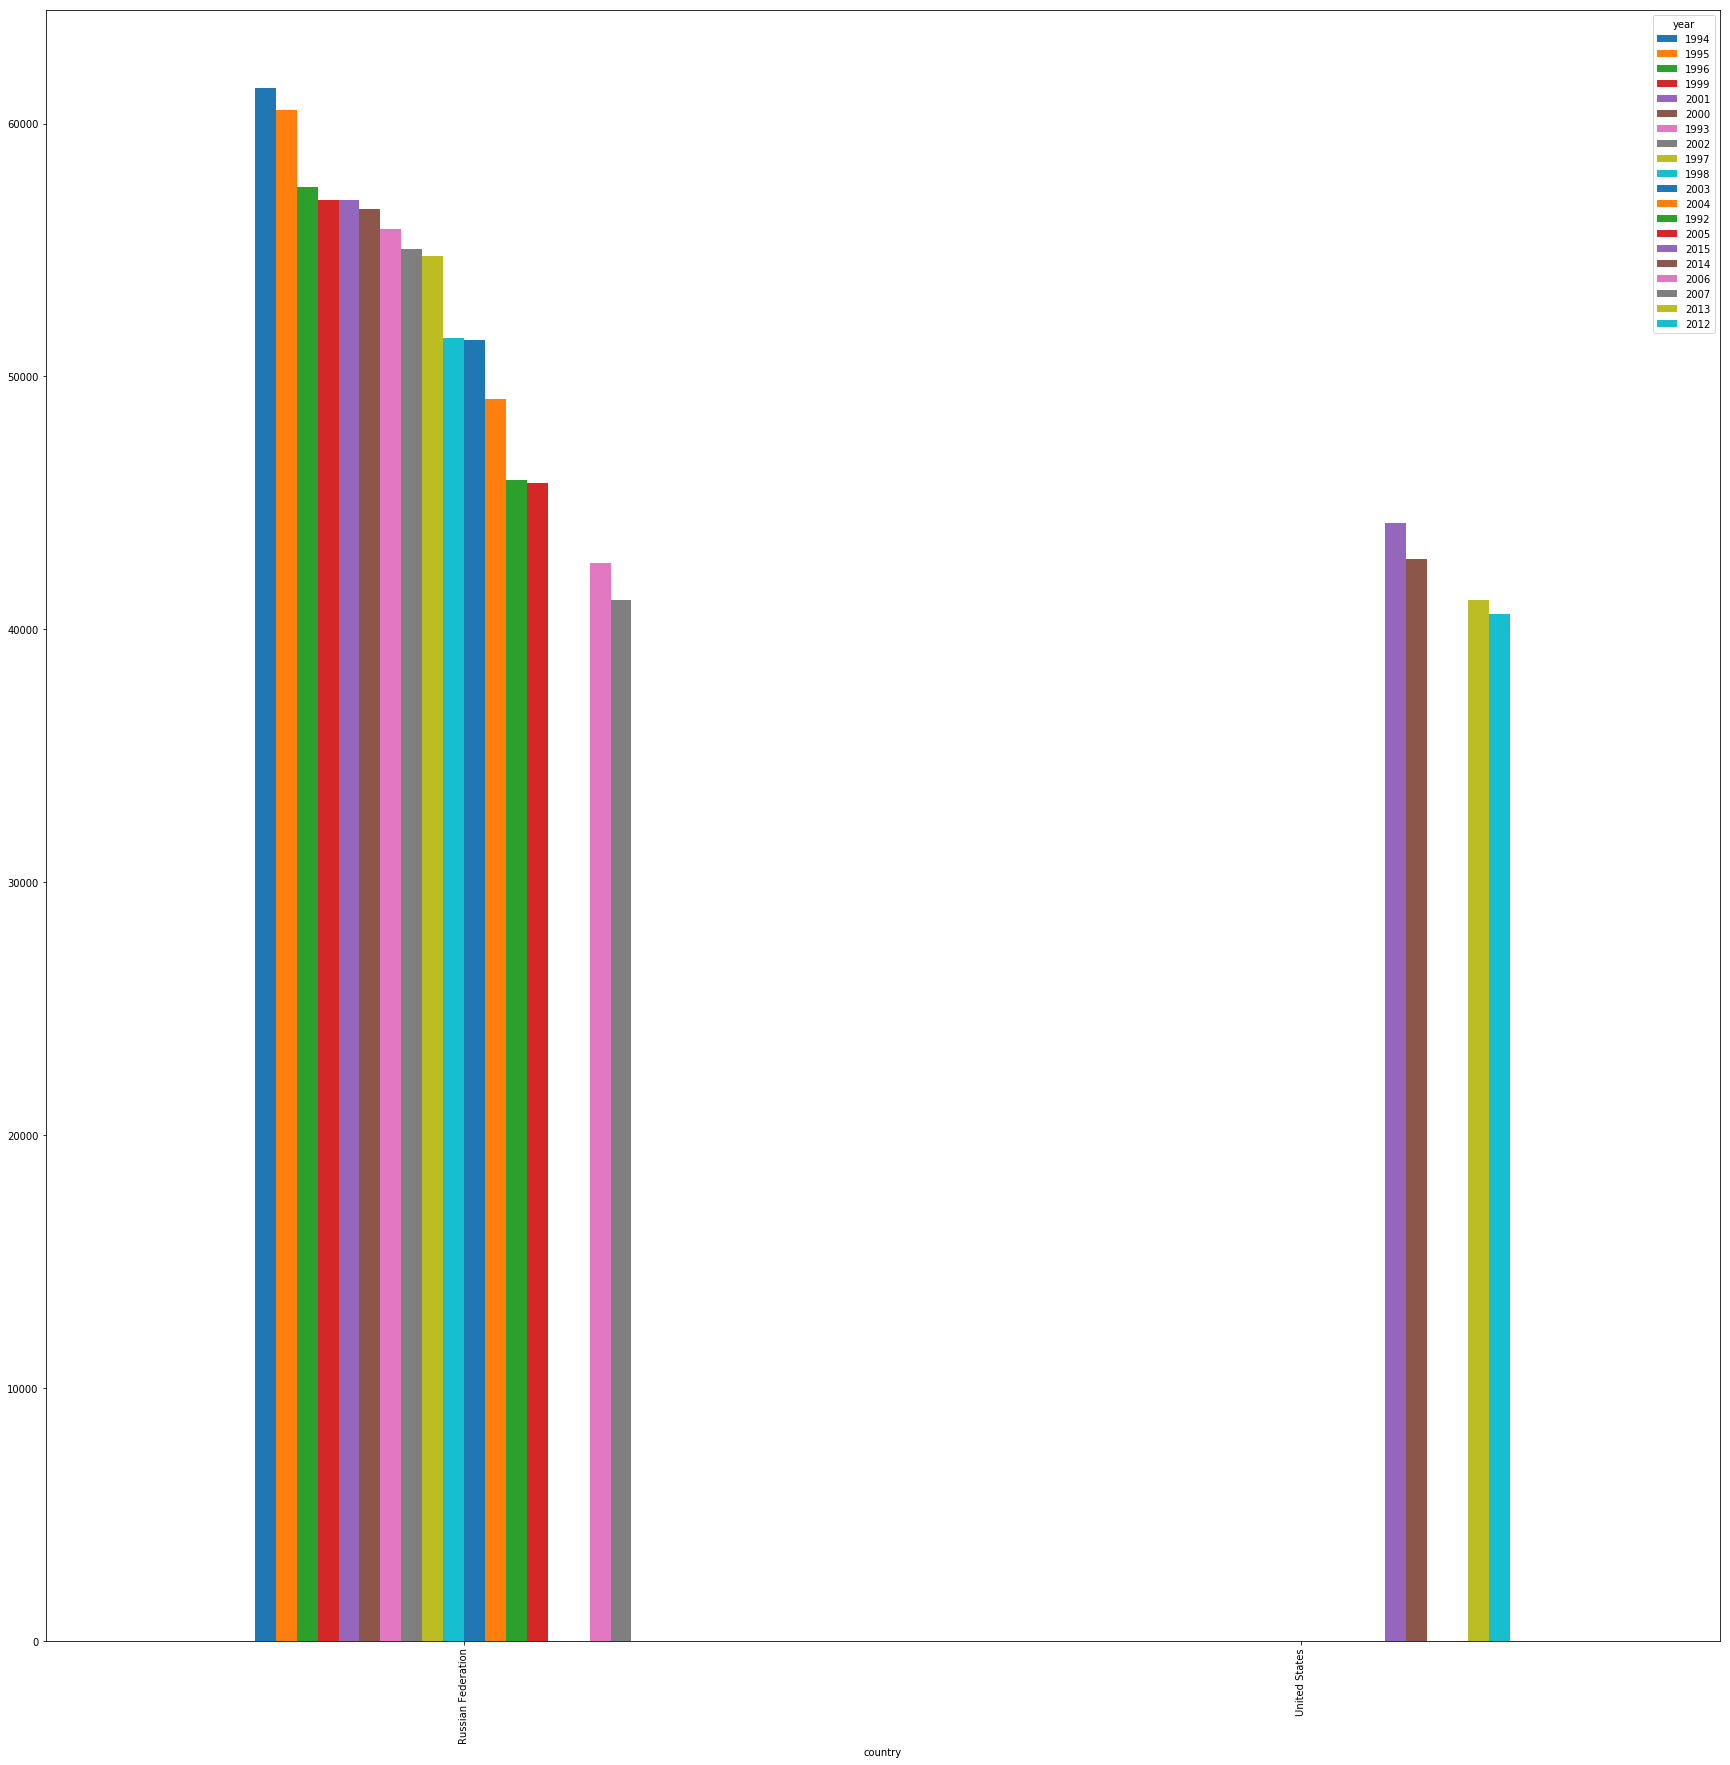

In [20]:
# by sum of country and year
sr.groupby(['country','year']).sum().sort_values(by='suicides_no', ascending=False).head(20).unstack().plot(y='suicides_no', kind='bar',figsize=(30,30))

From the graph above we see that the top 20 of the highest number of suicides for a year were divided into Russia and USA, which is in compliance with previously shown graphs grouped by country only. What would change if we deleted Russia and USA?

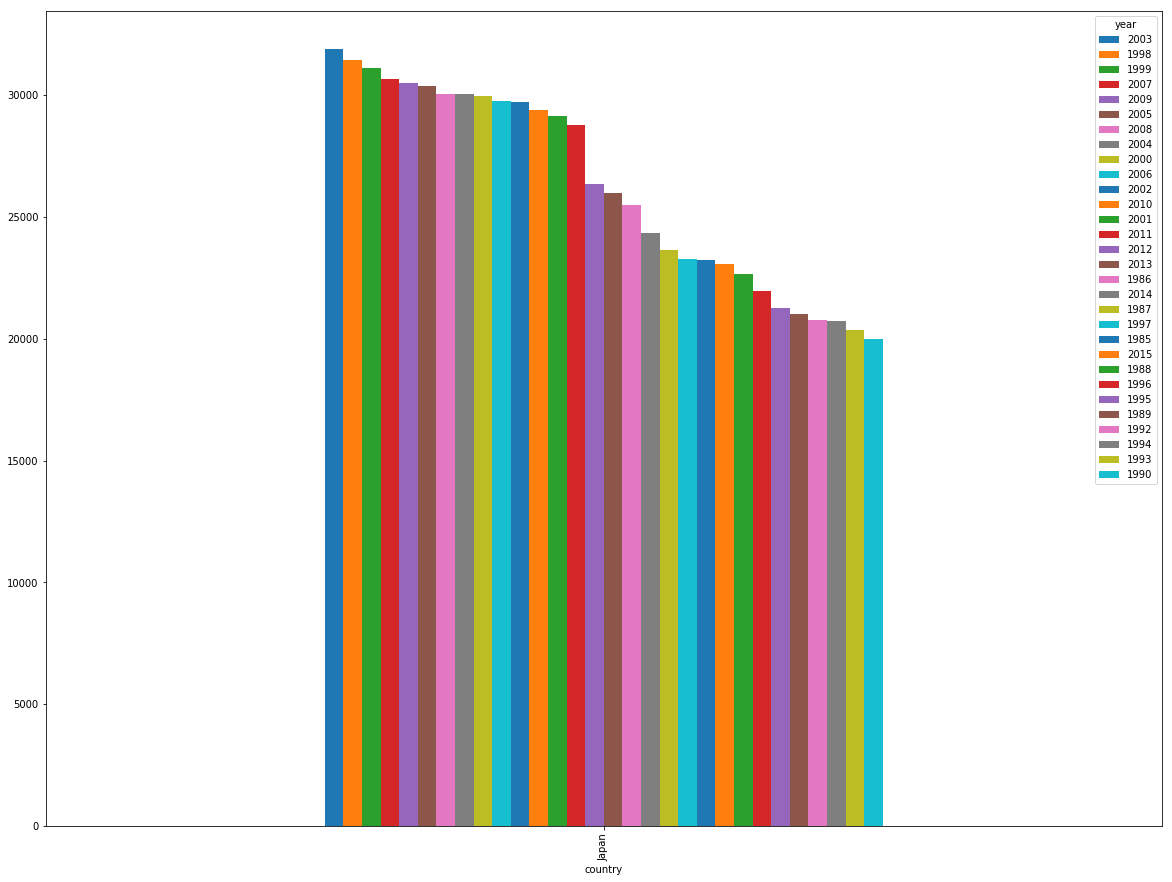

In [35]:
sr[sr['country'].str.contains('Russian Federation|United States') == False].groupby(['country','year']).sum().sort_values(by='suicides_no', ascending = False).head(30).unstack().plot(y='suicides_no', kind='bar', figsize=(20,15))

All we can see is Japan for the top 20 or 30 highest rates withou Russia and USA. If we go further with top 40, we see South Korea and Ukraine.

### Age

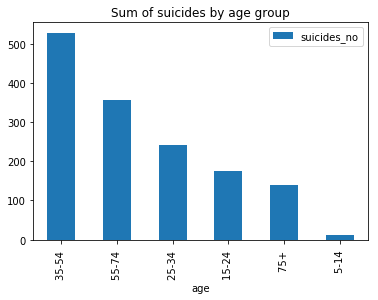

In [37]:
# by age group mean
sr.groupby('age').mean().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Sum of suicides by age group');

### Generation and age

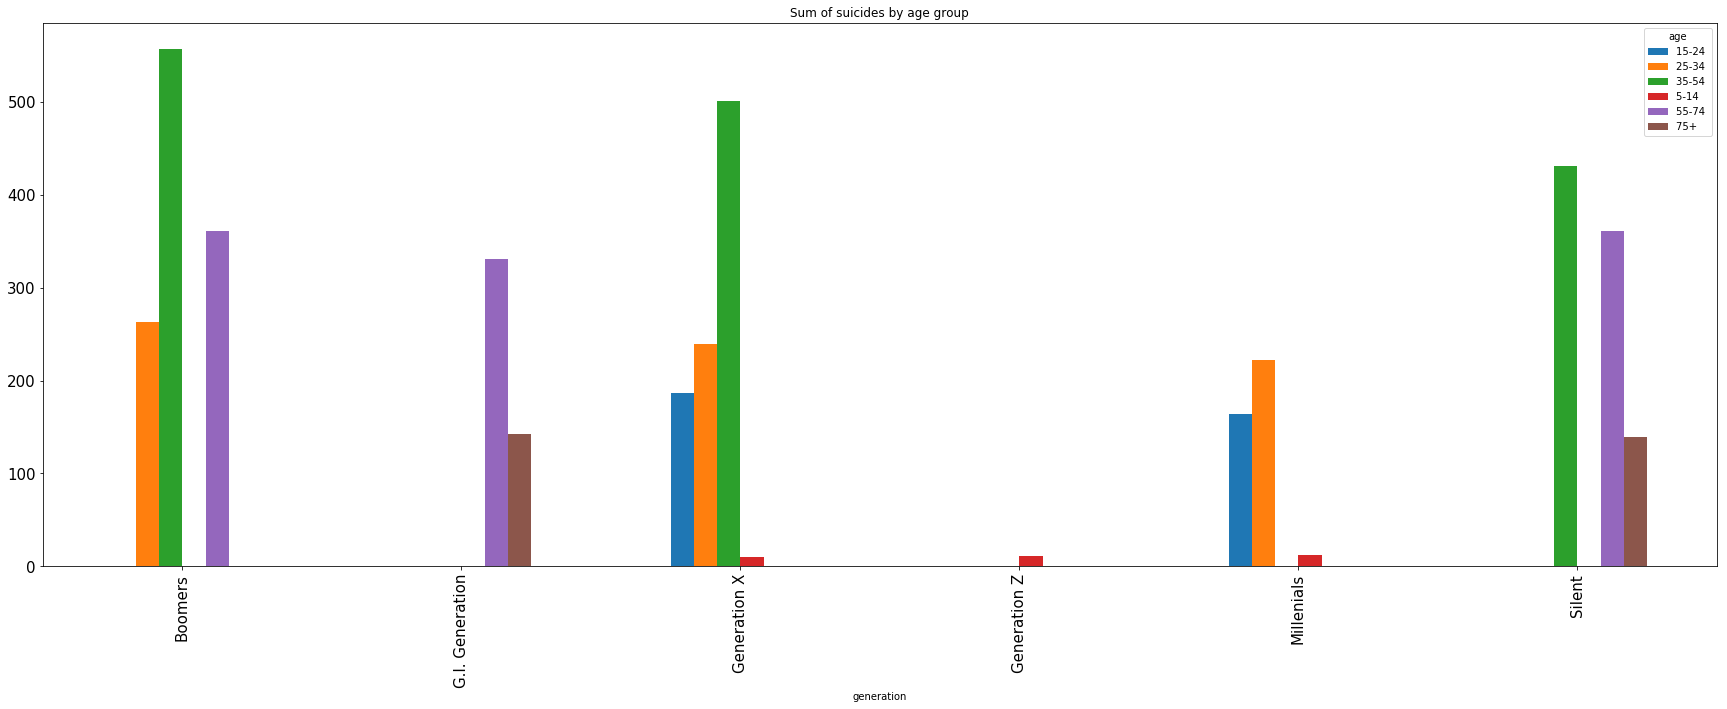

In [92]:
# by generation and age group mean
sr.groupby(['generation', 'age']).mean().sort_values(by='suicides_no', ascending=False).unstack().plot(kind='bar', y='suicides_no', title='Sum of suicides by age group', figsize=(30,10), fontsize=15);